In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
# Vamos a mantener solamente columnas de interés:
# País, Educación, Años de Experiencia, Tipo de Empleo (Full o part), Salario anual
# Se renombra el ConvertedComp a Salary

df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [4]:
# Hay un motón de entradas nulas para Salary

In [5]:
# Mostramos las entradas del df que no tienen entradas NULL 
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [6]:
df.info()
# Object es similar a string

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [7]:
# Se dropea la info donde hay nulos
df = df.dropna()
df.isnull().sum()
# Otro enfoque sería reemplazar los datos nulos
# con el promedio de los demás.
# Se hace esto porque aún queda una
# gran cantidad de datos con los que trabajar

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
# Mantener los Datapoints donde el
# usuario trabajó FullTime
df = df[df["Employment"]=="Employed, full-time"]
df = df.drop("Employment", axis=1)
# Una vez que se filtran los datos donde
# solo es FullTime, se dropea el Employment
# Porque es redundante y se entiende que todos
# son FullTime. Nos quedamos con 4 columnas  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
df['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [11]:
# Se visualiza que para muchos países
# Se tiene tan solo 1 o dos datos
# Vamos a eliminar los países con pocos datos

df.Country.value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


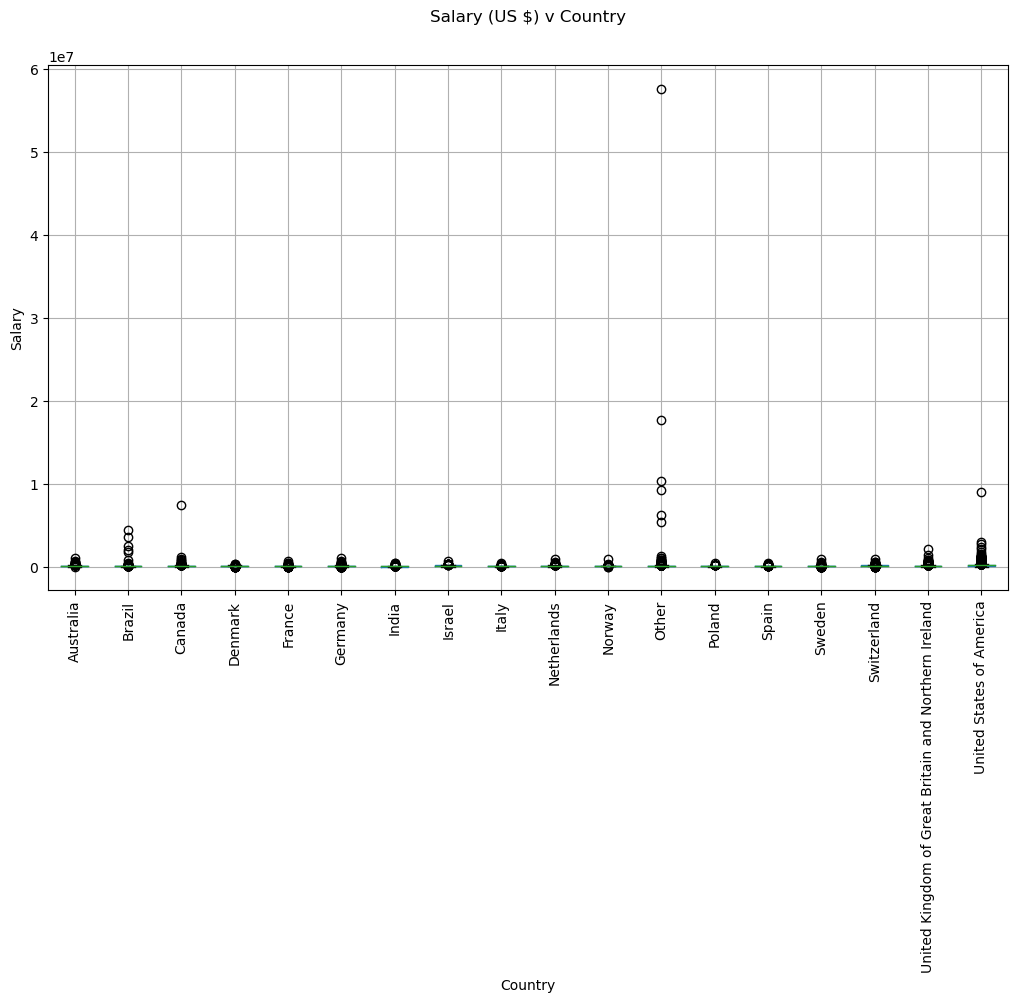

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US $) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Vamos a deshacernos de outliers:
# Establecemos que el rango está entee 100k a 250k al año
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 100000]
# Eliminamos los Other Countries
df = df[df['Country'] != 'Other']

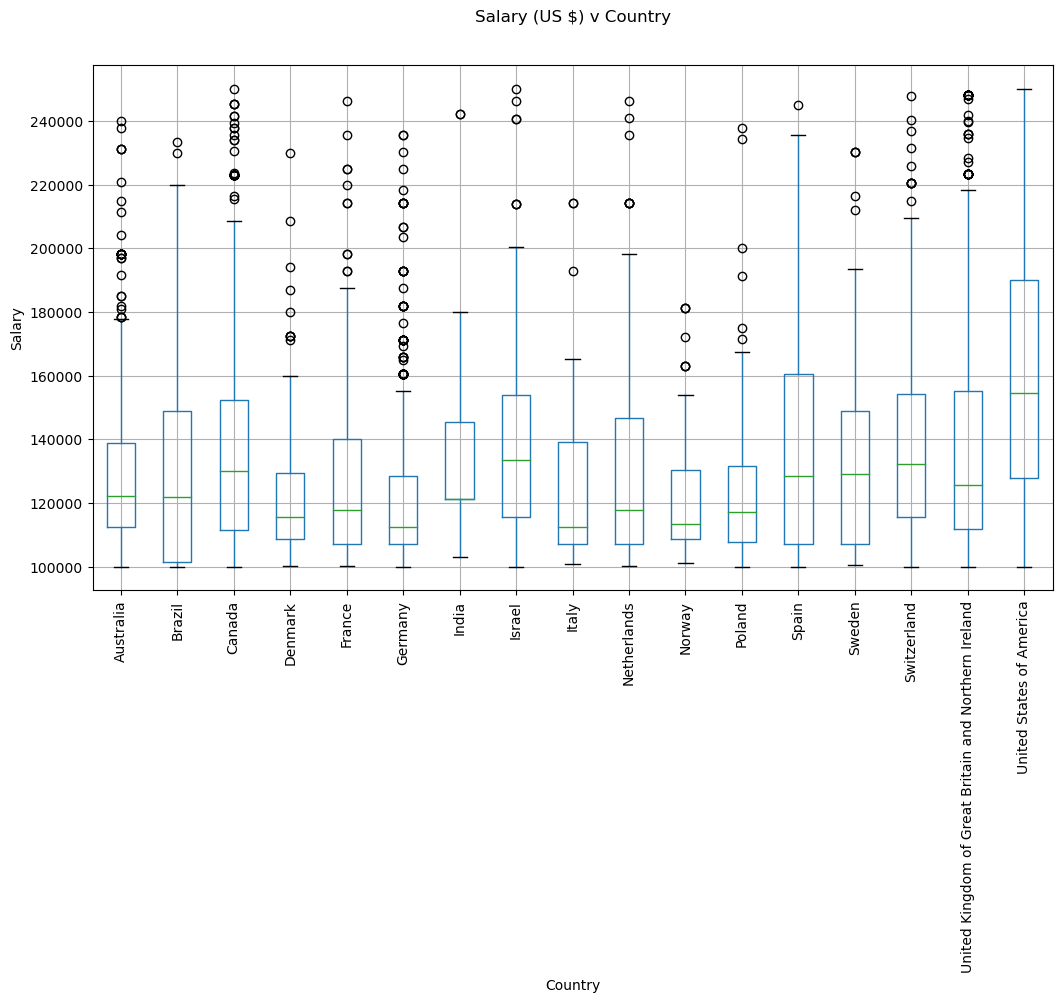

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US $) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Siguen habiendo outliers
# Pero ya no tantos

In [18]:
df.head(5)

,Country,EdLevel,YearsCodePro,Salary
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
6,United States of America,Some college/university study without earning ...,3,135000.0
13,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,150000.0
14,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,187407.0


In [19]:
# Al revisar los datos, vemos que tenemos
# Valores raros en lo de YearsCodePro

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11684 entries, 2 to 89156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11684 non-null  object 
 1   EdLevel       11684 non-null  object 
 2   YearsCodePro  11684 non-null  object 
 3   Salary        11684 non-null  float64
dtypes: float64(1), object(3)
memory usage: 456.4+ KB


In [20]:
# Years debería ser numérico
df["YearsCodePro"].unique()

array(['23', '7', '3', 'Less than 1 year', '10', '19', '15', '6', '2',
       '16', '9', '28', '24', '5', '12', '4', '20', '25', '30', '27',
       '43', '18', '33', '8', '22', '21', '11', '14', '42', '17', '26',
       '13', '31', '36', '39', '29', '40', '32', '44', '1', '34', '35',
       '37', 'More than 50 years', '41', '50', '38', '45', '47', '48',
       '49', '46'], dtype=object)

In [21]:
# Función para limpiar experiencia:

def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [22]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [23]:
df.head(9)

,Country,EdLevel,YearsCodePro,Salary
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.0,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.0,156000.0
6,United States of America,Some college/university study without earning ...,3.0,135000.0
13,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.5,150000.0
14,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,187407.0
15,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10.0,107090.0
30,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19.0,237974.0
36,United States of America,Some college/university study without earning ...,15.0,130000.0
38,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,136552.0


In [24]:
#Veamos los títulos en EdLevel:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [25]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

In [26]:
# Aplicamos la función a EdLevel.
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [27]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [28]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree        6454
Master’s degree          2771
Less than a Bachelors    1866
Post grad                 593
Name: count, dtype: int64

In [29]:
df.shape

(11684, 4)

In [30]:
df.info()
# Vemos que, para EdLevel
# Una variable categórica
# Debemos aplicarle un encoding
# A fin de transformarla en numérica
# y pueda ser aplicada al modelo de ML

<class 'pandas.core.frame.DataFrame'>
Index: 11684 entries, 2 to 89156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11684 non-null  object 
 1   EdLevel       11684 non-null  object 
 2   YearsCodePro  11684 non-null  float64
 3   Salary        11684 non-null  float64
dtypes: float64(2), object(2)
memory usage: 456.4+ KB


In [31]:
# Se importa un label encoder de scikit

from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder() # se crea el LabelEncoder object
# Primero con EdLevel, se mapea Less than Bachelor a 0, Bachelor a 1, y así...
df['EdLevel'] = le_education.fit_transform(df['EdLevel']) # Se aplica el Label con fit_transform
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [32]:
# Se convierten los países a números.

le_country = LabelEncoder()
df['Country'] =le_country.fit_transform(df['Country'])
df['Country'].unique()

array([16,  9,  5,  0, 15,  2, 14,  8, 10,  3,  7, 13,  4, 11,  1, 12,  6])

In [33]:
# Dividimos la data en Features y Target Variable

X = df.drop("Salary", axis=1)
y = df["Salary"]

In [36]:
# Se implementa el Modelo de Regresion

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [37]:
# Se hacen predicciones con la data de entrenamiento:
y_pred = linear_reg.predict(X)

In [38]:
# Evaluamos el modelo con el mean_squared_error

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [39]:
error # Tenemos un error de 37617.82 USD

37617.82532998656

In [41]:
# Probando con un Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [42]:
# Predecimos los valores
y_pred = dec_tree_reg.predict(X)

In [43]:
# Evaluamos con el mean_squared_error

error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,376.90


In [44]:
# El error se ve reducido un poco
# Pero sigue siendo del orden de los 34k
# Probamos con el RandomForestRegresor

from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [46]:
y_pred = random_forest_reg.predict(X)

In [49]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

# El error se mantiene en el mismo rango

$34,508.21


In [50]:
# Probamos qué modelo es mejor empleando un GridSearchCV
# Queremos encontrar el modelo con los mejores parámetros
# Vamos a buscar los mejores parámetros para un DTR

from sklearn.model_selection import GridSearchCV

# Definimos distintos valores para el parámetro max_depth
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth} # Debe tener el mismo nombre que el key argument

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

# Esto va a probar modelos con los distintos parámetros especificados
# Y según un score basado en el neg_mean_squared_error nos dará el mejor modelo

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [52]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error)) # Eso tiene más error.

$36,178.19


In [53]:
# Vamos a usar este último regressor
# Para aplicarlo a nueva data

X

,Country,EdLevel,YearsCodePro
2,16,0,23.0
3,16,0,7.0
6,16,1,3.0
13,16,2,0.5
14,9,2,7.0
...,...,...,...
89112,16,0,8.0
89113,16,0,10.0
89139,16,2,12.0
89141,16,0,11.0


In [66]:
# Country, EdLevel, YearsCode

X = np.array([["United States of America", 'Master’s degree', 15]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [67]:
Xdf = pd.DataFrame(X, columns=["Country", "EdLevel", "YearsCodePro"])

In [68]:
Xdf.head()

,Country,EdLevel,YearsCodePro
0,United States of America,Master’s degree,15


In [60]:
# Utilizamos los encoders ya definidos para transformar estos datos de entrada

X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
# Se convierten a float todos los valores:
X = X.astype(float)
X

array([[16.,  2., 15.]])

In [69]:
# Supongamos que ya has definido le_country y le_education

# Aplicar la transformación a Xdf
Xdf['Country'] = le_country.transform(Xdf['Country'])
Xdf['EdLevel'] = le_education.transform(Xdf['EdLevel'])

# Convertir todas las columnas a tipo float
Xdf = Xdf.astype(float)

# Ahora Xdf contiene los mismos datos que X, pero sigue siendo un DataFrame
print(Xdf)


   Country  EdLevel  YearsCodePro
0     16.0      2.0          15.0


In [61]:
# Predecimos con estos datos nuevos:

y_pred = regressor.predict(X)
y_pred

C:\Users\Miuler BM\.conda\envs\ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([172312.53490481])

In [70]:
# Predecimos con estos datos nuevos pero dataframe:

y_pred = regressor.predict(Xdf)
y_pred

array([172312.53490481])

In [62]:
# Guardamos el modelo y los encoders para utilizarlos después

import pickle

In [63]:


data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
    
# Esto guarda el modelo de regresion y los encoders en un archivo "saved_steps.pkl"

In [64]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

# Esto abre el archivo guardado y asigna los elementos a cada variable
# A regressor_loaded le asigna el que tiene la clave "model" por ejemplo.

In [65]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Miuler BM\.conda\envs\ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([172312.53490481])